<a href="https://colab.research.google.com/github/SarahSouzaPontes/SVM_linear/blob/main/SVM_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(
    n_samples=10_000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2,
    flip_y=0,
    scale=1.,
    random_state=42,
)
X

array([[-1.41258169,  1.95744559],
       [ 2.59928079,  2.33739959],
       [-1.51671004,  1.3448303 ],
       ...,
       [-0.8884581 ,  0.97253017],
       [ 1.81835488,  0.96181981],
       [-2.49848631,  2.22767294]])

In [7]:
X.shape

(10000, 2)

In [8]:
y

array([0, 1, 0, ..., 0, 1, 0])

In [9]:
X = pd.DataFrame(X,columns=['feat_1','feat_2'])
y = pd.Series(y)
X

,feat_1,feat_2
0,-1.412582,1.957446
1,2.599281,2.337400
2,-1.516710,1.344830
3,2.204172,2.077315
4,-1.559352,2.253855
...,...,...
9995,-1.283983,1.107912
9996,-2.901450,2.575456
9997,-0.888458,0.972530
9998,1.818355,0.961820


In [10]:
y

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Length: 10000, dtype: int64

Text(0.5, 1.0, 'Conjunto teste')

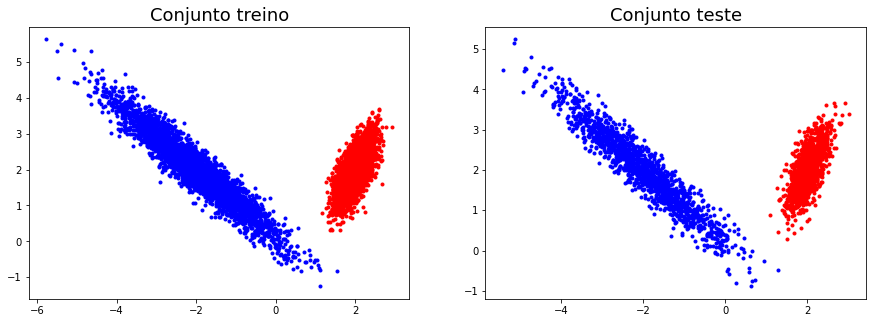

In [11]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
plt.title('Conjunto treino', fontsize=18)

plt.subplot(1,2,2)
plt.plot(X_ts.loc[y_ts==0].feat_1,X_ts.loc[y_ts==0].feat_2,'b.')
plt.plot(X_ts.loc[y_ts==1].feat_1,X_ts.loc[y_ts==1].feat_2,'r.')
plt.title('Conjunto teste', fontsize=18)

In [12]:
from sklearn.svm import SVC

svc = SVC(C=1., kernel='linear', probability=True, random_state=61658)
svc.fit(X_tr,y_tr)

SVC(kernel='linear', probability=True, random_state=61658)

In [13]:
svc.intercept_, svc.coef_

(array([-2.36457726]), array([[1.98183094, 1.34637754]]))

In [14]:
(-1) * -2.36457726 / 1.34637754

1.7562512666395191

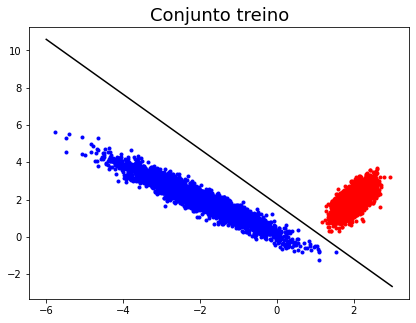

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
plt.title('Conjunto treino', fontsize=18)

x_plot = np.linspace(-6,3,1000)
y_plot = (-svc.intercept_-svc.coef_[0,0]*x_plot)/svc.coef_[0,1]
plt.plot(x_plot, y_plot, 'k-')

array([ 859, 1894, 6836, 6983,  736, 2340, 3168, 4232], dtype=int32)

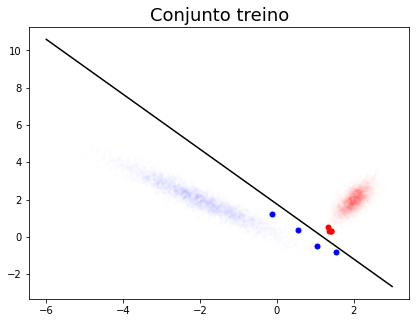

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.',alpha=.003)
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.',alpha=.003)

X_tr_sup = X_tr.iloc[svc.support_]
y_tr_sup = y_tr.iloc[svc.support_]

plt.plot(X_tr_sup.loc[y_tr_sup==0].feat_1,X_tr_sup.loc[y_tr_sup==0].feat_2,'b.',alpha=1.,ms=10)
plt.plot(X_tr_sup.loc[y_tr_sup==1].feat_1,X_tr_sup.loc[y_tr_sup==1].feat_2,'r.',alpha=1.,ms=10)
plt.title('Conjunto treino', fontsize=18)

x_plot = np.linspace(-6,3,1000)
y_plot = (-svc.intercept_-svc.coef_[0,0]*x_plot)/svc.coef_[0,1]
plt.plot(x_plot, y_plot, 'k-')

svc.support_

Text(0.5, 1.0, 'Conjunto teste')

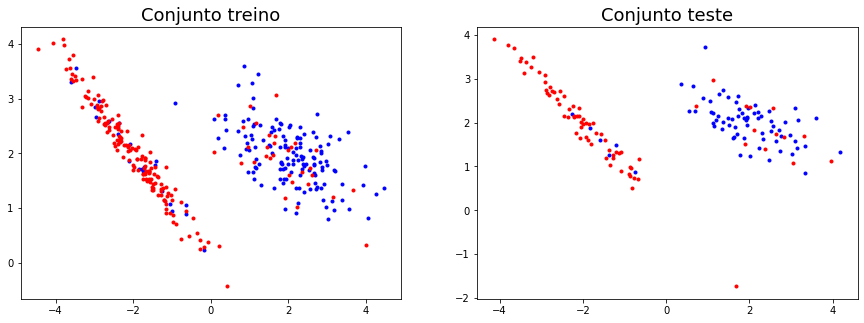

In [17]:
X,y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2.,
    flip_y=0.30,
    scale=1.,
    random_state=1,
)

X = pd.DataFrame(X,columns=['feat_1','feat_2'])
y = pd.Series(y)

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
plt.title('Conjunto treino', fontsize=18)

plt.subplot(1,2,2)
plt.plot(X_ts.loc[y_ts==0].feat_1,X_ts.loc[y_ts==0].feat_2,'b.')
plt.plot(X_ts.loc[y_ts==1].feat_1,X_ts.loc[y_ts==1].feat_2,'r.')
plt.title('Conjunto teste', fontsize=18)

0.001
0.01
0.1
1


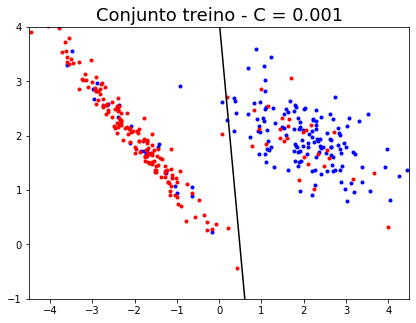

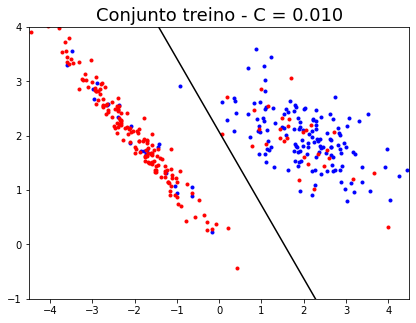

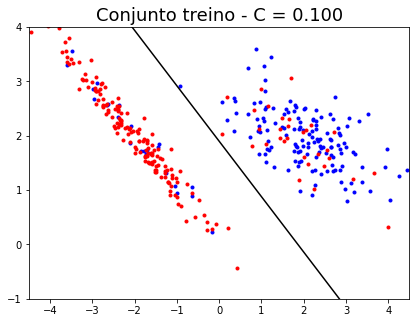

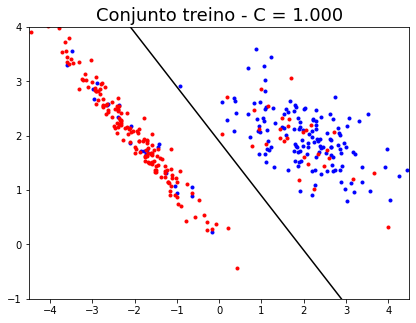

In [18]:
for C in [1e-3,1e-2,1e-1,1,]:
    print(C)

    svc = SVC(C=C, kernel='linear', probability=True, random_state=61658)
    svc.fit(X_tr,y_tr)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
    plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
    plt.title(f'Conjunto treino - C = {C:.3f}', fontsize=18)

    x_plot = np.linspace(-6,3,1000)
    y_plot = (-svc.intercept_-svc.coef_[0,0]*x_plot)/svc.coef_[0,1]
    plt.plot(x_plot, y_plot, 'k-')
    plt.ylim(-1,4)
    plt.xlim(-4.5,4.5)

In [19]:
df = pd.read_csv('svm.csv')
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,1


In [20]:
X = df.drop('Exited',axis=1)
y = df.Exited
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [21]:
y.mean()

0.2037

In [22]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.30, random_state=61658)

In [23]:
X_tr.CreditScore.min(),X_tr.CreditScore.max()

(350, 850)

In [24]:
X_tr.Age.min(),X_tr.Age.max()

(18, 92)

In [25]:
X_tr.Balance.min(),X_tr.Balance.max()

(0.0, 250898.09)

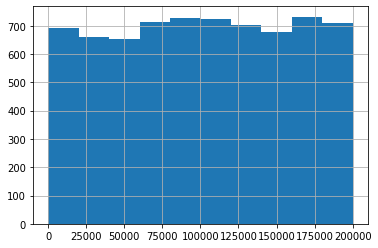

In [26]:
X_tr.EstimatedSalary.hist()

In [27]:
X_tr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9057,704,33,0,130499.09,2,1,1,74804.36,1,0,0,1,0
81,777,32,2,0.00,1,1,0,136458.19,1,0,0,1,0
3433,587,37,6,104414.03,1,1,0,192026.02,0,1,0,1,0
1768,760,28,1,141038.57,2,0,0,16287.38,0,0,1,0,1
1888,429,60,7,0.00,2,1,1,163691.48,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,648,33,5,138664.24,1,1,0,29076.27,0,1,0,0,1
9637,790,31,2,151290.16,1,1,1,172437.12,1,0,0,1,0
8675,714,54,7,126113.28,1,1,0,112777.38,1,0,0,0,1
8806,681,38,6,181804.34,2,1,1,57517.71,0,1,0,0,1


In [28]:
#Colocando 90% dos dados de -1 a +1 e 5% fora desse intervalo

from sklearn.preprocessing import RobustScaler

rs = RobustScaler(quantile_range=(5.,95.))
X_tr2 = rs.fit_transform(X_tr)
X_ts2 = rs.transform(X_ts)

In [29]:
X_tr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9057,704,33,0,130499.09,2,1,1,74804.36,1,0,0,1,0
81,777,32,2,0.00,1,1,0,136458.19,1,0,0,1,0
3433,587,37,6,104414.03,1,1,0,192026.02,0,1,0,1,0
1768,760,28,1,141038.57,2,0,0,16287.38,0,0,1,0,1
1888,429,60,7,0.00,2,1,1,163691.48,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,648,33,5,138664.24,1,1,0,29076.27,0,1,0,0,1
9637,790,31,2,151290.16,1,1,1,172437.12,1,0,0,1,0
8675,714,54,7,126113.28,1,1,0,112777.38,1,0,0,0,1
8806,681,38,6,181804.34,2,1,1,57517.71,0,1,0,0,1


In [30]:
pd.DataFrame(X_tr2,columns=X_tr.columns)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.160494,-0.114286,-0.625,0.205847,1.0,0.0,0.0,-0.146611,0.0,0.0,0.0,1.0,-1.0
1,0.385802,-0.142857,-0.375,-0.591058,0.0,0.0,-1.0,0.195104,0.0,0.0,0.0,1.0,-1.0
2,-0.200617,0.000000,0.125,0.046556,0.0,0.0,-1.0,0.503088,-1.0,1.0,0.0,1.0,-1.0
3,0.333333,-0.257143,-0.500,0.270207,1.0,-1.0,-1.0,-0.470941,-1.0,0.0,1.0,0.0,0.0
4,-0.688272,0.657143,0.250,-0.591058,1.0,0.0,0.0,0.346044,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.012346,-0.114286,0.000,0.255708,0.0,0.0,-1.0,-0.400059,-1.0,1.0,0.0,0.0,0.0
6996,0.425926,-0.171429,-0.375,0.332810,0.0,0.0,0.0,0.394517,0.0,0.0,0.0,1.0,-1.0
6997,0.191358,0.485714,0.250,0.179065,0.0,0.0,-1.0,0.063853,0.0,0.0,0.0,0.0,0.0
6998,0.089506,0.028571,0.125,0.519147,1.0,0.0,0.0,-0.242422,-1.0,1.0,0.0,0.0,0.0


In [31]:
np.logspace(-7,7,10,base=2)

array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02])

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C': np.logspace(-7,7,10,base=2),
    'class_weight': [None, 'balanced'],
}

svc = SVC(kernel='linear', probability=True, random_state=61658)

grid = GridSearchCV(svc, params, cv=3, scoring='roc_auc', verbose=10)

In [33]:
grid.fit(X_tr2,y_tr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START C=0.0078125, class_weight=None.............................
[CV 1/3; 1/20] END C=0.0078125, class_weight=None;, score=0.676 total time=   1.7s
[CV 2/3; 1/20] START C=0.0078125, class_weight=None.............................
[CV 2/3; 1/20] END C=0.0078125, class_weight=None;, score=0.635 total time=   1.7s
[CV 3/3; 1/20] START C=0.0078125, class_weight=None.............................
[CV 3/3; 1/20] END C=0.0078125, class_weight=None;, score=0.712 total time=   1.7s
[CV 1/3; 2/20] START C=0.0078125, class_weight=balanced.........................
[CV 1/3; 2/20] END C=0.0078125, class_weight=balanced;, score=0.756 total time=   4.3s
[CV 2/3; 2/20] START C=0.0078125, class_weight=balanced.........................
[CV 2/3; 2/20] END C=0.0078125, class_weight=balanced;, score=0.762 total time=   4.2s
[CV 3/3; 2/20] START C=0.0078125, class_weight=balanced.........................
[CV 3/3; 2/20] END C=0.0078125

GridSearchCV(cv=3,
             estimator=SVC(kernel='linear', probability=True,
                           random_state=61658),
             param_grid={'C': array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02]),
                         'class_weight': [None, 'balanced']},
             scoring='roc_auc', verbose=10)